# Datos epidemiológicos COVID-19 (Canarias)

Fuente de datos: https://datos.canarias.es/catalogos/general/dataset/datos-epidemiologicos-covid-19

Procesados con Jupyter, Pandas y sqlite3 por Víctor R. Ruiz &lt;rvr@linotipo.es&gt;

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Modificar tamaño predefinido de los gráficos
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

## Conectar con la base de datos
# El fichero csv se ha convertido a formato sqlite3. Ver convert-cv19.sh.
sql3 = sqlite3.connect("covidepican.sql3")
casos = pd.read_sql_query("SELECT * FROM tiempos LIMIT 5", sql3)

# Mostrar los primero cinco registros de la tabla
casos.head()

,fecha_datos,isla,municipio,sexo,grupo_edad,fecha_caso,fecha_fallecido,fecha_curado,estado_caso,tiempo_fallecido,tiempo_alta
0,2021-09-06,GRAN CANARIA,Las Palmas de Gran Canaria,Mujer,20 - 29,2021-07-14,,,Activo en domicilio,None,NaN
1,2021-09-06,GRAN CANARIA,Telde,Mujer,20 - 29,2021-01-25,,2021-02-08,Cerrado por alta médica,None,14.0
2,2021-09-06,TENERIFE,Arona,Hombre,60 - 69,2021-03-11,,2021-03-22,Cerrado por alta médica,None,11.0
3,2021-09-06,TENERIFE,Güímar,Hombre,20 - 29,2021-01-22,,2021-02-02,Cerrado por alta médica,None,11.0
4,2021-09-06,FUERTEVENTURA,Puerto del Rosario,Mujer,20 - 29,2021-01-09,,2021-01-18,Cerrado por alta médica,None,9.0


Cada registro de la tabla es un caso, cuyo estado a la fecha "fecha_datos" (fecha de descarga de la tabla), se indica en "estado_caso". La fecha de inicio del caso se indica en la columna "fecha_caso" y la fecha de finalización se indica bien en "fecha_fallecido" o bien en "fecha_curado".

<AxesSubplot:title={'center':'Casos diarios'}, xlabel='fecha_caso'>

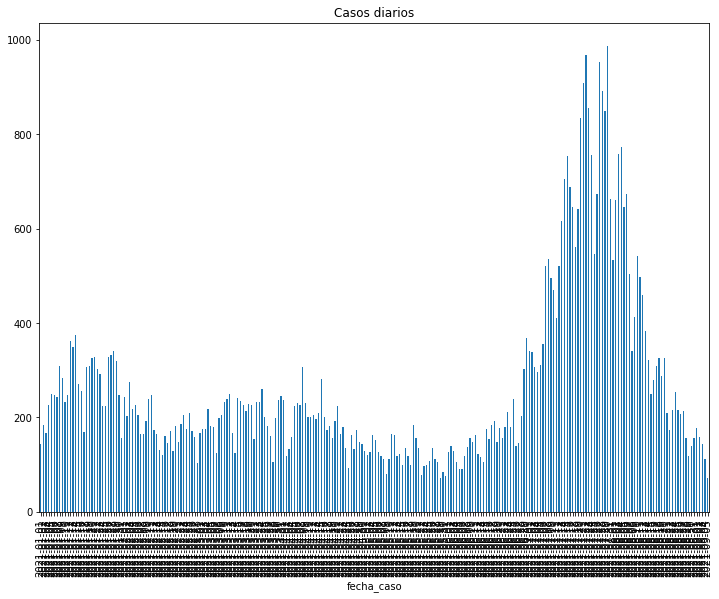

In [2]:
# Casos diarios
casos_fecha = pd.read_sql_query("""
    SELECT count(*) as Casos, fecha_caso
    FROM tiempos
    GROUP BY fecha_caso""", sql3, index_col="fecha_caso")
casos_fecha.plot(kind="bar", title="Casos diarios", legend=False)

array([<AxesSubplot:title={'center':'(Casos, Activo en domicilio)'}, xlabel='fecha_caso'>,
       <AxesSubplot:title={'center':'(Casos, Activo hosp. en UCI)'}, xlabel='fecha_caso'>,
       <AxesSubplot:title={'center':'(Casos, Activo hosp. en planta)'}, xlabel='fecha_caso'>,
       <AxesSubplot:title={'center':'(Casos, Cerrado por alta médica)'}, xlabel='fecha_caso'>,
       <AxesSubplot:title={'center':'(Casos, Fallecido)'}, xlabel='fecha_caso'>],
      dtype=object)

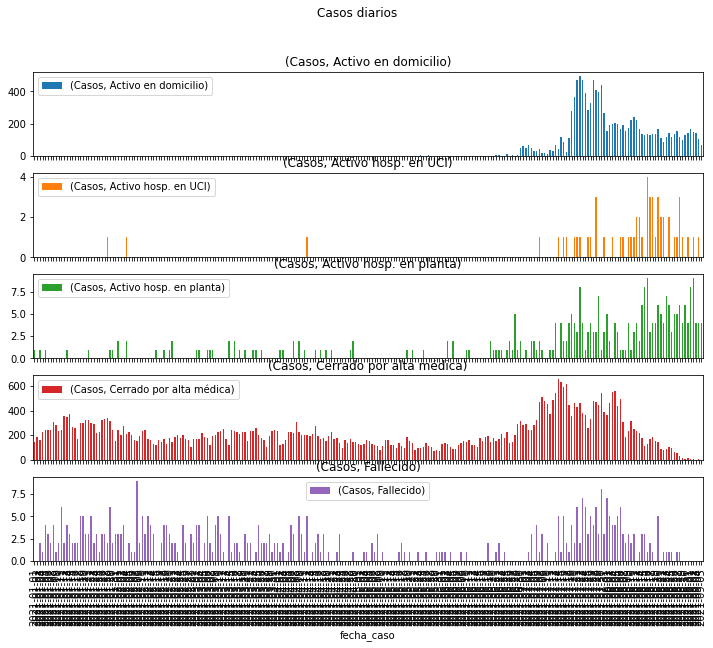

In [3]:
# Casos diarios por estado del caso
casos_fecha = pd.read_sql_query("""
    SELECT count(*) as Casos, fecha_caso, estado_caso
    FROM tiempos
    GROUP BY fecha_caso, estado_caso""", sql3, index_col=["fecha_caso", "estado_caso"])
casos_fecha.unstack().plot(kind="bar", title="Casos diarios", subplots=True)

<AxesSubplot:title={'center':'Estado'}, xlabel='estado_caso'>

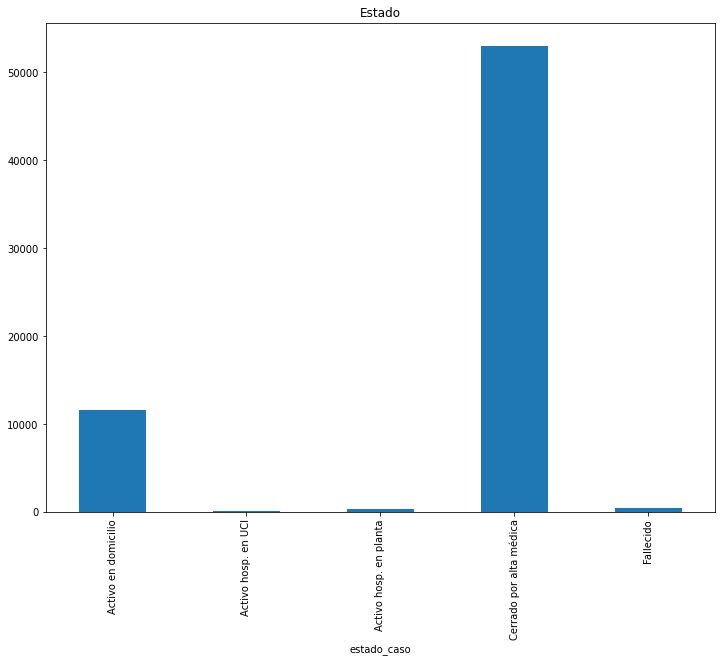

In [4]:
# Número de casos por estado del caso
estados = pd.read_sql_query("""
    SELECT count(*) as Casos, estado_caso
    FROM tiempos
    GROUP BY estado_caso""", sql3, index_col=["estado_caso"])
estados.plot(kind="bar", title="Estado", legend=False)

<AxesSubplot:title={'center':'Casos por grupo de edad'}, xlabel='grupo_edad'>

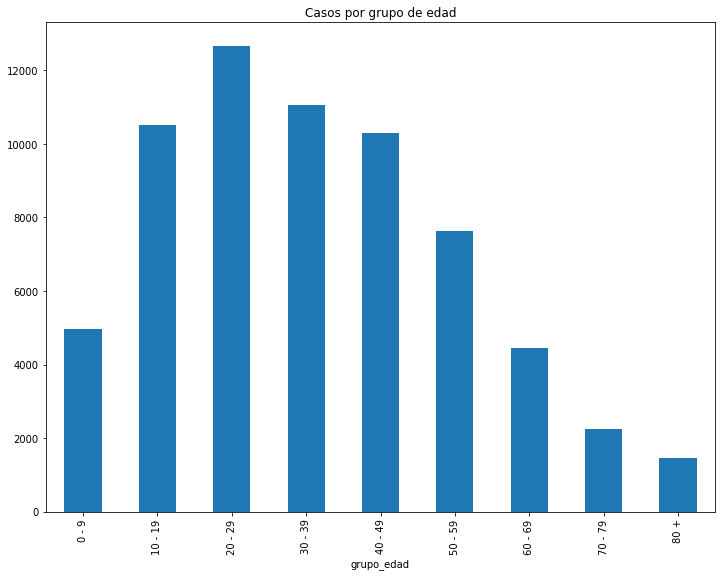

In [5]:
# Casos por grupo de edad
casos_edad = pd.read_sql_query("""
    SELECT count(*) as Casos, grupo_edad
    FROM tiempos
    GROUP BY grupo_edad""", sql3, index_col=["grupo_edad"])
casos_edad.plot(kind="bar", title="Casos por grupo de edad", legend=False)

<AxesSubplot:title={'center':'Fallecidos por sexo'}, xlabel='sexo'>

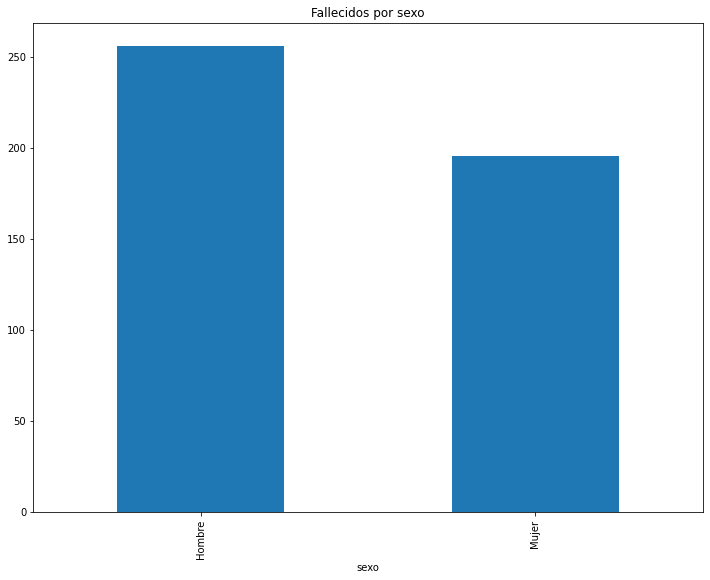

In [6]:
# Fallecidos por sexo
fallecidos_sexo = pd.read_sql_query("""
    SELECT count(*), sexo
    FROM tiempos
    WHERE estado_caso = "Fallecido"
    GROUP BY sexo
    """, sql3, index_col="sexo")
fallecidos_sexo.plot(kind="bar", title="Fallecidos por sexo", legend=False)

<AxesSubplot:title={'center':'Fallecidos por grupo de edad'}, xlabel='grupo_edad'>

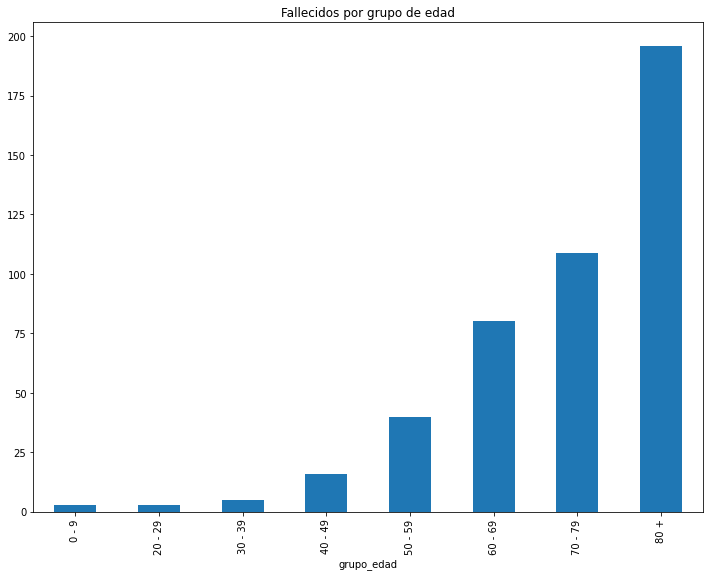

In [8]:
# Fallecidos por grupo de edad
fallecidos_edad = pd.read_sql_query("""
    SELECT count(*), grupo_edad
    FROM tiempos
    WHERE estado_caso = "Fallecido"
    GROUP BY grupo_edad
    """, sql3, index_col="grupo_edad")
fallecidos_edad.plot(kind="bar", title="Fallecidos por grupo de edad", legend=False)

<AxesSubplot:title={'center':'Fallecidos por grupo de edad y sexo'}, xlabel='grupo_edad'>

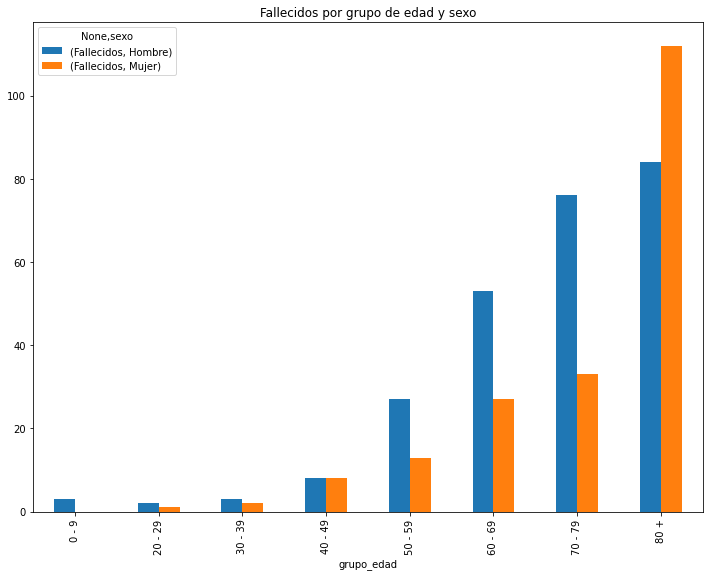

In [9]:
# Fallecidos por grupo de edad y sexo
fallecidos_edad = pd.read_sql_query("""
    SELECT count(*) as Fallecidos, grupo_edad, sexo
    FROM tiempos
    WHERE estado_caso = "Fallecido"
    GROUP BY grupo_edad, sexo
    """, sql3, index_col=["grupo_edad", "sexo"])
fallecidos_edad.unstack().plot(kind="bar", title="Fallecidos por grupo de edad y sexo")

En casi todos los grupos de edad, los hombres siempre son mayoría de fallecidos, salvo en el grupo de más de 80 años.

<AxesSubplot:title={'center':'Dias hasta el fallecimiento (media)'}, ylabel='isla'>

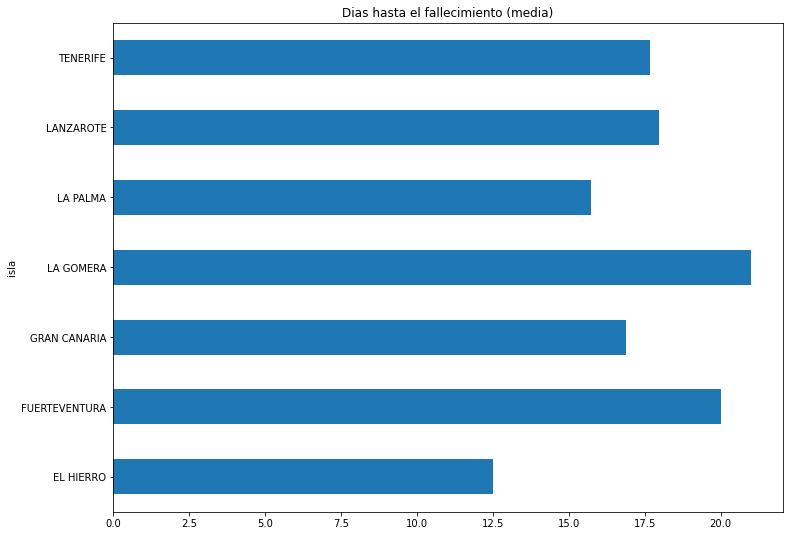

In [10]:
# Días hasta el fallecimiento (media) por isla
media_fallecimiento_islas = pd.read_sql_query("""
    SELECT isla, avg(tiempo_fallecido) AS dias
    FROM tiempos
    WHERE fecha_fallecido IS NOT "" AND fecha_fallecido > fecha_caso
    GROUP BY isla""",
    sql3, index_col="isla")
media_fallecimiento_islas.plot(kind="barh", title="Días hasta el fallecimiento (media) por isla", legend=False)

<AxesSubplot:title={'center':'Dias hasta el fallecimiento (media)'}, xlabel='grupo_edad'>

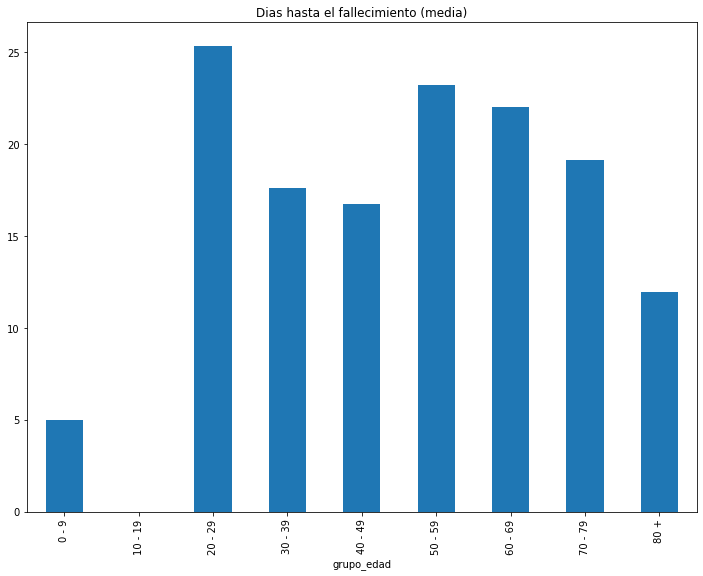

In [11]:
# Dias hasta el fallecimiento (media)
media_fallecimiento_edad = pd.read_sql_query("""
    SELECT grupo_edad, avg(tiempo_fallecido) AS dias
    FROM tiempos
    GROUP BY grupo_edad
    """, sql3, index_col="grupo_edad")
media_fallecimiento_edad.plot(kind="bar", title="Dias hasta el fallecimiento (media)", legend=False)

<AxesSubplot:title={'center':'Dias hasta el alta (media)'}, ylabel='isla'>

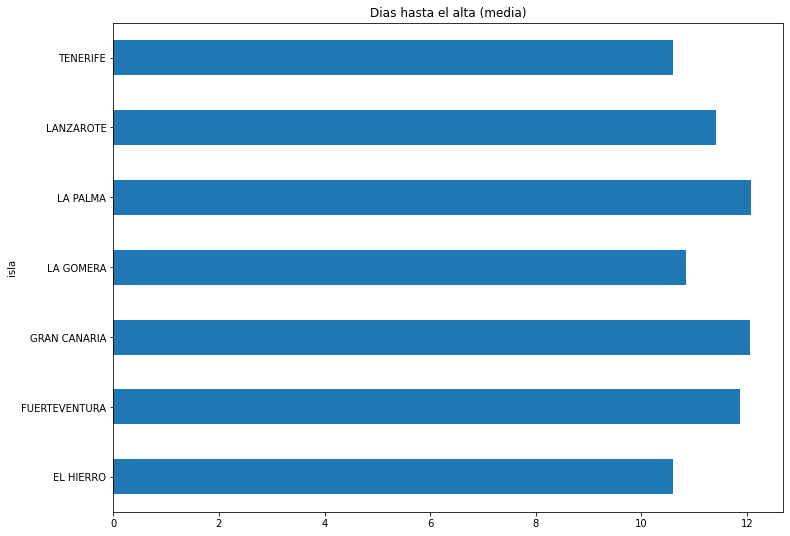

In [12]:
# Días hasta el alta (media) por isla
media_alta_islas = pd.read_sql_query("""
    SELECT isla, avg(tiempo_alta) AS dias
    FROM tiempos
    WHERE isla IS NOT "SIN ESPECIFICAR"
    GROUP BY isla""", sql3, index_col="isla")
media_alta_islas.plot(kind="barh", title="Días hasta el alta (media) por isla", legend=False)

<AxesSubplot:title={'center':'Dias hasta el alta (media por mes)'}, xlabel='mes'>

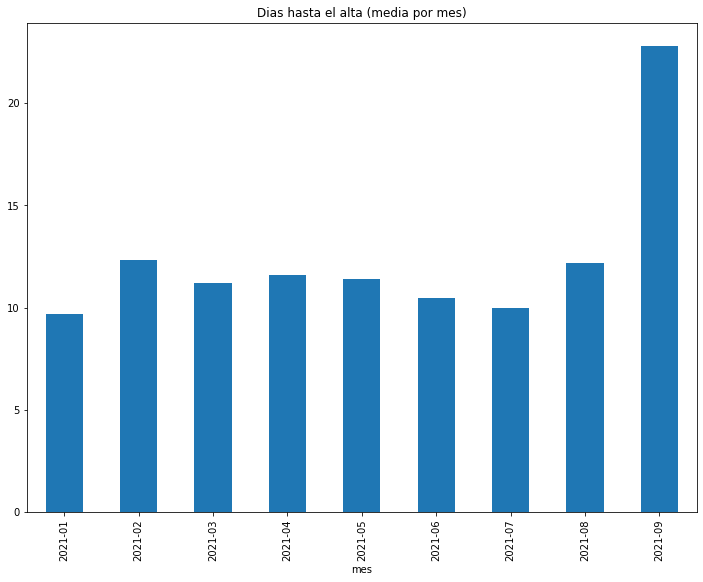

In [13]:
# Días hasta el alta (media por mes)
media_alta_mes = pd.read_sql_query("""
    SELECT avg(tiempo_alta) AS dias, strftime("%Y-%m", fecha_curado) AS mes
    FROM tiempos
    WHERE fecha_curado IS NOT ""
    GROUP BY mes""", sql3, index_col="mes")
media_alta_mes.plot(kind="bar", title="Días hasta el alta (media por mes)", legend=False)

<AxesSubplot:title={'center':'Casos cerrados por alta por mes'}, xlabel='fecha'>

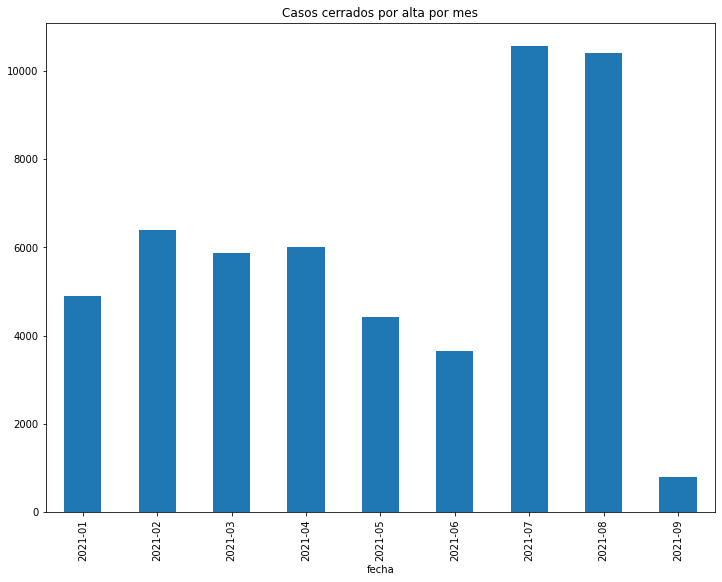

In [14]:
# Casos cerrados por alta por mes
cerrados_mes = pd.read_sql_query("""
    SELECT count(*), strftime("%Y-%m", fecha_curado) AS fecha
    FROM tiempos
    WHERE estado_caso IS "Cerrado por alta médica"
    GROUP BY fecha""", sql3, index_col="fecha")
cerrados_mes.plot(kind="bar", title="Casos cerrados por alta por mes", legend=False)

<AxesSubplot:title={'center':'Fallecidos por mes'}, xlabel='fecha'>

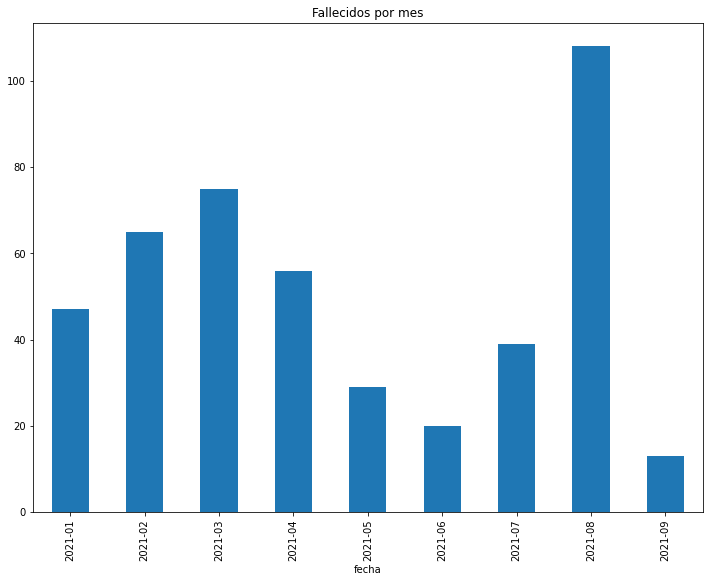

In [15]:
# Fallecidos por mes
fallecidos_mes = pd.read_sql_query("""
    SELECT count(*), strftime("%Y-%m", fecha_fallecido) AS fecha
    FROM tiempos
    WHERE estado_caso IS "Fallecido"
    GROUP BY fecha""", sql3, index_col="fecha")
fallecidos_mes.plot(kind="bar", title="Fallecidos por mes", legend=False)

<AxesSubplot:title={'center':'Días hasta el fallecimiento (media por mes)'}, xlabel='mes'>

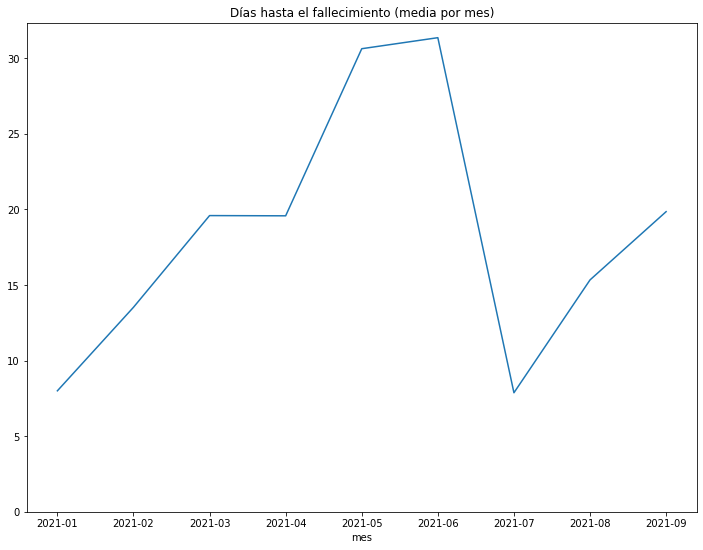

In [16]:
# Días hasta el fallecimiento (media por mes)
media_fallecimiento_mes = pd.read_sql_query("""
    SELECT avg(tiempo_fallecido) AS dias, strftime("%Y-%m", fecha_fallecido) AS mes
    FROM tiempos
    WHERE fecha_fallecido IS NOT ""
    GROUP BY mes""", sql3, index_col="mes")
media_fallecimiento_mes.plot(title="Días hasta el fallecimiento (media por mes)", legend=False, ylim=(0,media_fallecimiento_mes["dias"].max()+1))

<AxesSubplot:title={'center':'Días hasta el alta (media por mes)'}, xlabel='mes'>

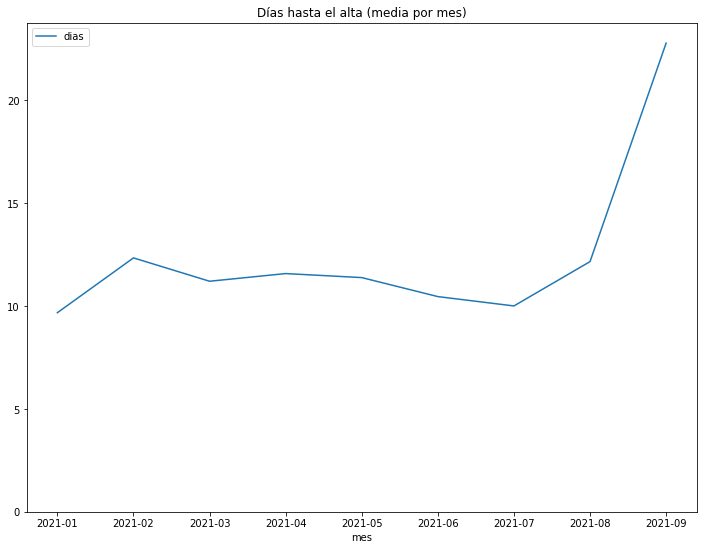

In [17]:
# Días hasta el alta (media por mes)
media_alta_mes = pd.read_sql_query("""
    SELECT avg(tiempo_alta) AS dias, strftime("%Y-%m", fecha_curado) AS mes
    FROM tiempos
    WHERE fecha_curado IS NOT ""
    GROUP BY mes""", sql3, index_col="mes")
media_alta_mes.plot(title="Días hasta el alta (media por mes)", ylim=(0, media_alta_mes["dias"].max()+1))

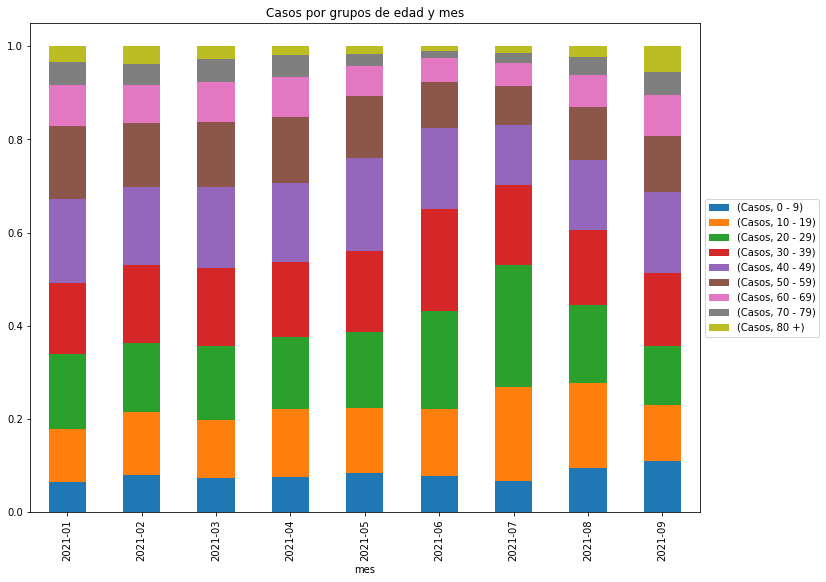

In [18]:
# Casos por grupos de edad y mes
edad_mes = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, strftime("%Y-%m", tiempos.fecha_caso) AS mes, grupo_edad
    FROM tiempos
    GROUP BY grupo_edad, mes""", sql3, index_col=["mes","grupo_edad"])
# Calcular el porcentaje
edad_mes = edad_mes.unstack()
edad_mes = edad_mes.div(edad_mes.sum(1),axis='rows')
ax = edad_mes.plot(kind="bar", title="Casos por grupos de edad y mes", stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

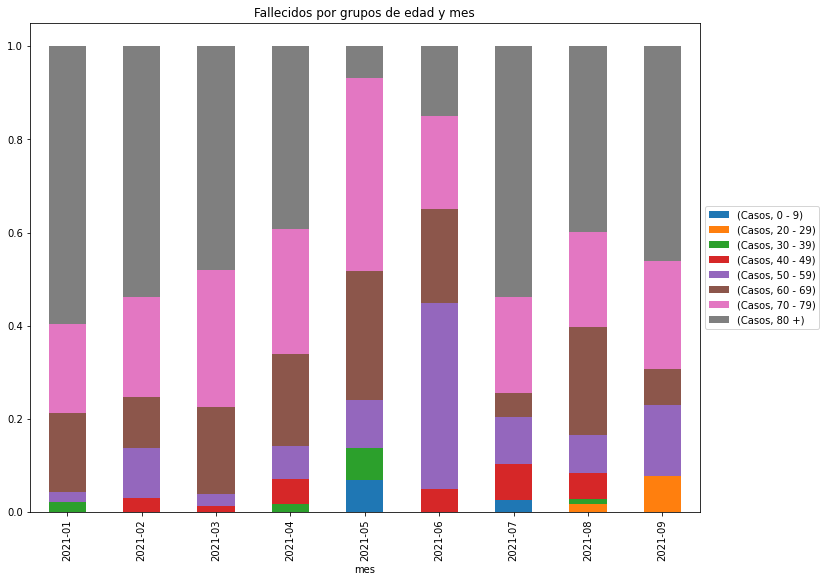

In [19]:
# Fallecidos por grupos de edad y mes
edad_fallecidos_mes = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, strftime("%Y-%m", tiempos.fecha_fallecido) AS mes, grupo_edad
    FROM tiempos
    WHERE fecha_fallecido IS NOT ""
    GROUP BY grupo_edad, mes""", sql3, index_col=["mes","grupo_edad"])
# Calcular el porcentaje
edad_fallecidos_mes = edad_fallecidos_mes.unstack()
edad_fallecidos_mes = edad_fallecidos_mes.div(edad_fallecidos_mes.sum(1),axis='rows')
ax = edad_fallecidos_mes.plot(kind="bar", title="Fallecidos por grupos de edad y mes", stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #here is the magic

<AxesSubplot:title={'center':'Casos activos por grupos de edad y estado'}, xlabel='grupo_edad'>

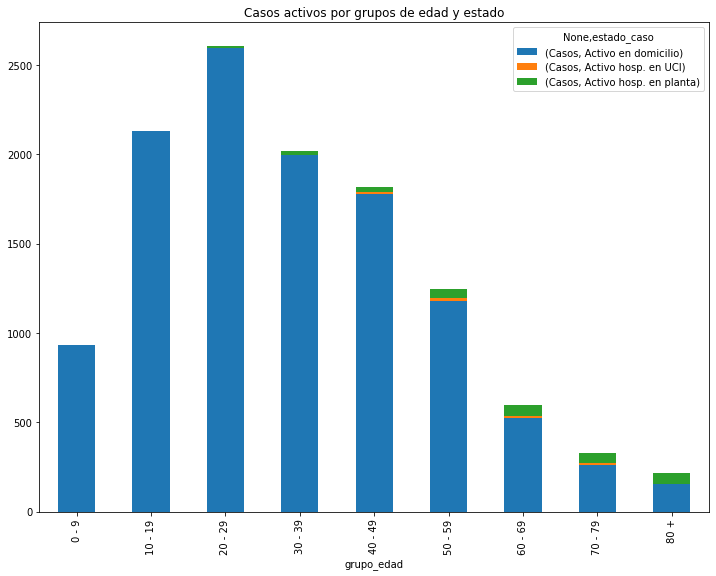

In [20]:
# Casos activos por grupos de edad y estado
edad_casos = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, grupo_edad, estado_caso
    FROM tiempos
    WHERE estado_caso IS NOT "Fallecido" AND estado_caso IS NOT "Cerrado por alta médica"
    GROUP BY grupo_edad, estado_caso""", sql3, index_col=["grupo_edad", "estado_caso"])
edad_casos = edad_casos.unstack()
edad_casos.plot(kind="bar", title="Casos activos por grupos de edad y estado", stacked=True)

<AxesSubplot:title={'center':'Casos activos - En domicilio por grupo de edad'}, xlabel='grupo_edad'>

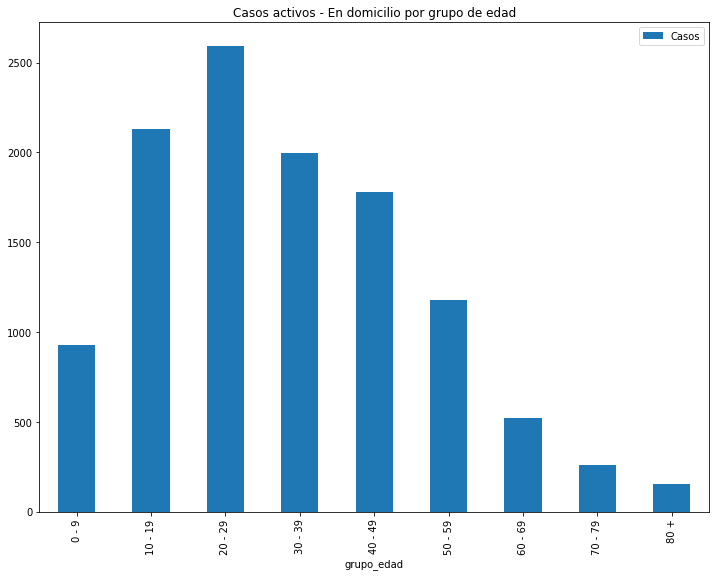

In [21]:
# Casos activos en domicilio por grupo de edad"
edad_domicilio = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, grupo_edad
    FROM tiempos
    WHERE estado_caso = "Activo en domicilio"
    GROUP BY grupo_edad""", sql3, index_col="grupo_edad")
edad_domicilio.plot(kind="bar", title="Casos activos en domicilio por grupo de edad")

<AxesSubplot:title={'center':'Casos activos - Hospitalizados en planta por grupo de edad'}, xlabel='grupo_edad'>

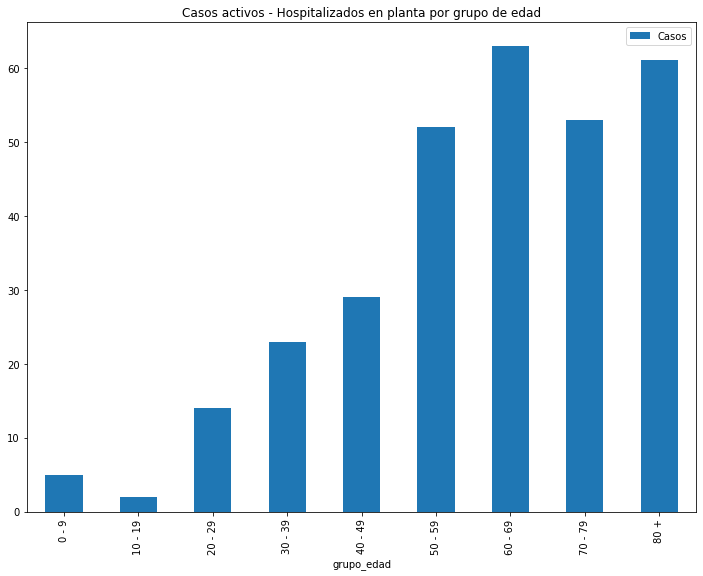

In [22]:
# Casos activos hospitalizados en planta por grupo de edad
edad_planta = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, grupo_edad
    FROM tiempos
    WHERE estado_caso = "Activo hosp. en planta"
    GROUP BY grupo_edad""", sql3, index_col="grupo_edad")
edad_planta.plot(kind="bar", title="Casos activos hospitalizados en planta por grupo de edad")

<AxesSubplot:title={'center':'Casos activos - Hospitalizados en UCI por grupo de edad'}, xlabel='grupo_edad'>

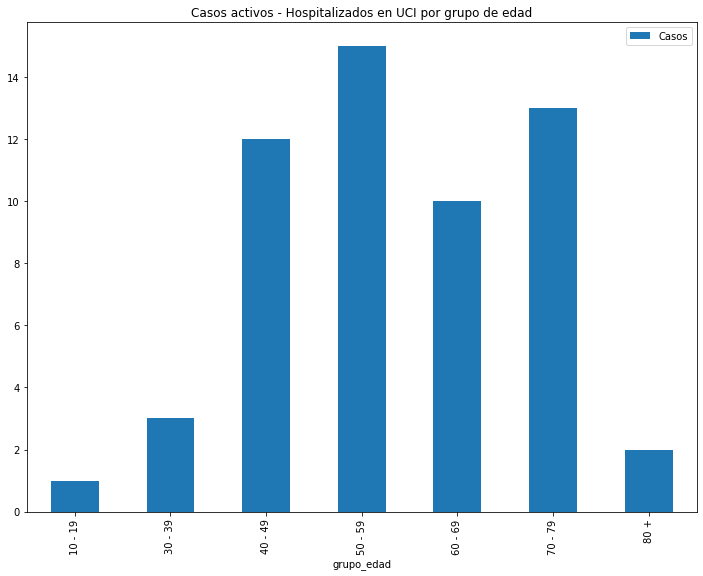

In [23]:
# Casos activos hospitalizados en UCI por grupo de edad
edad_uci = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, grupo_edad
    FROM tiempos
    WHERE estado_caso = "Activo hosp. en UCI"
    GROUP BY grupo_edad""", sql3, index_col="grupo_edad")
edad_uci.plot(kind="bar", title="Casos activos hospitalizados en UCI por grupo de edad")

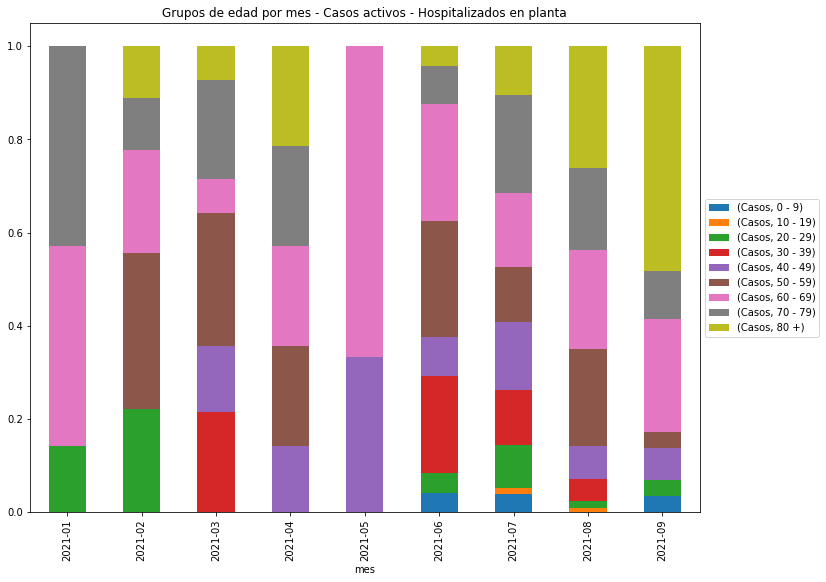

In [24]:
# Casos activos hospitalizados en planta por grupos de edad y mes
edad_planta_mes = pd.read_sql_query("""
    SELECT COUNT(*) as Casos, strftime("%Y-%m", tiempos.fecha_caso) AS mes, grupo_edad
    FROM tiempos
    WHERE estado_caso = "Activo hosp. en planta"
    GROUP BY grupo_edad, mes""", sql3, index_col=["mes","grupo_edad"])
# Calcular el porcentaje
edad_planta_mes = edad_planta_mes.unstack()
edad_planta_mes = edad_planta_mes.div(edad_planta_mes.sum(1),axis='rows')
ax = edad_planta_mes.plot(kind="bar", title="Casos activos hospitalizados en planta por grupos de edad y mes", stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))